In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
plt.style.use("customstyle")

import sys
sys.path.append("../modules")

import PBD_analog

colors = ["#" + x for x in ["000000","cf5c36","bcd696","985f99","9684a1"]]

In [5]:
# Load inference data
outdir = "C:/Users/pveron/Output_clusters/PBD_analog/12149"

simul_infer = pd.read_csv(outdir + "/all_simulations_inference.csv")
simul_infer["combinaison"] = 10*simul_infer.param_vary + simul_infer.i_param_var

summary_all_mcmc = pd.read_csv(outdir + "/summary_all_MCMC.csv")

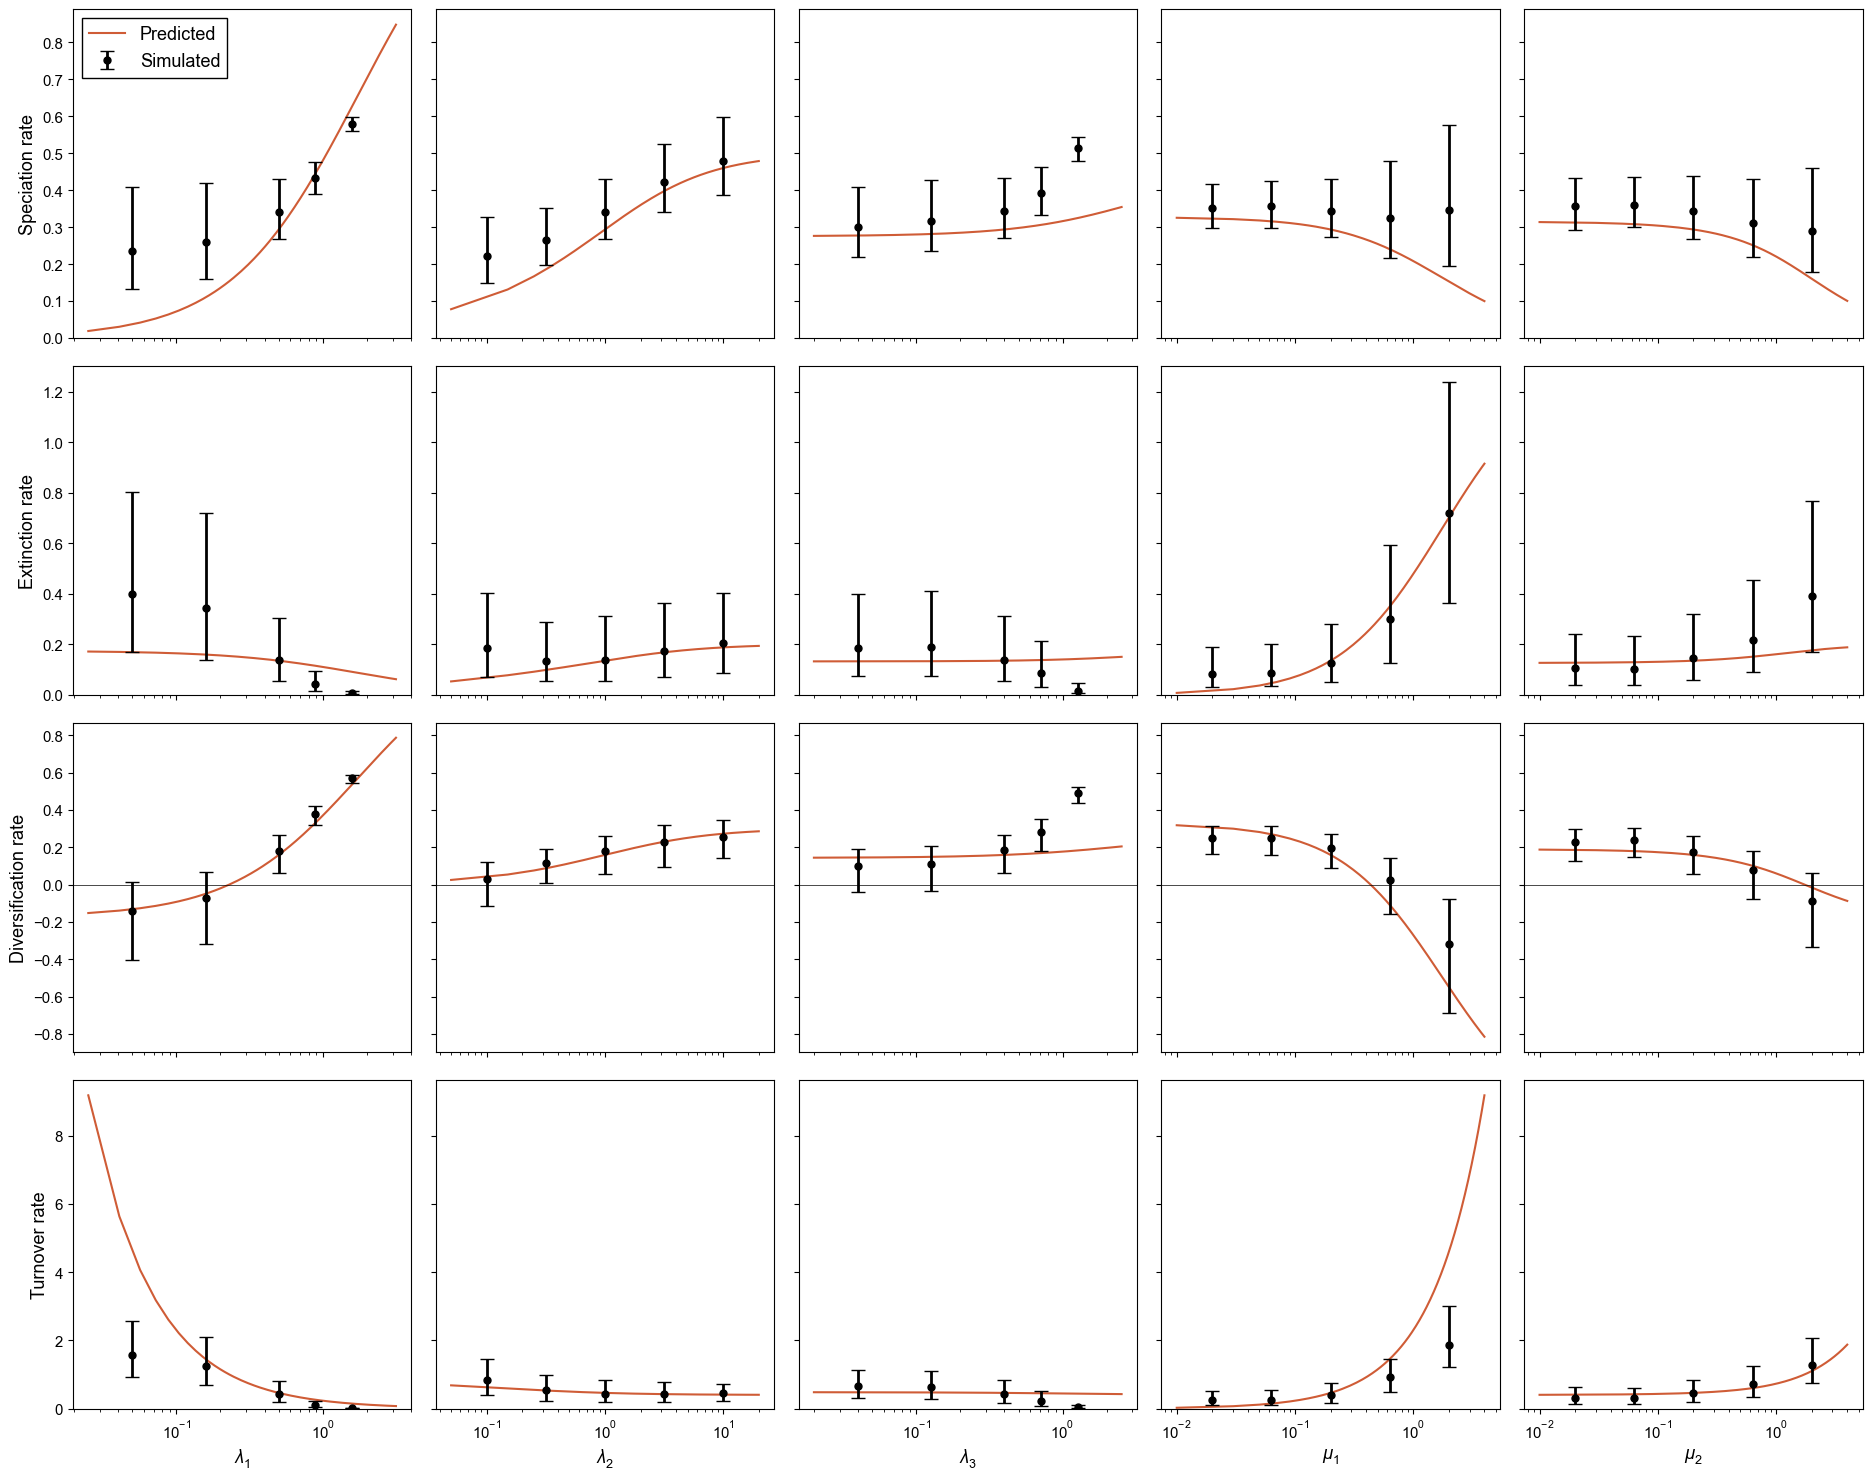

In [6]:
# Define ranges for the parameters 
ranges = {'l1':(0.025, np.power(10,0.5) * 2 * 0.5),
          'l2':(0.05, 20),
          'l3':(0.02, np.power(10.0,0.5) * 2 * 0.4),
          'm1':(0.01, 4),
          'm2':(0.01, 4)}

burnin = 500

param_default = {'l1':0.5, 'l2':1.0, 'l3':0.4, 'm1':0.2, 'm2':0.2}
par_names = list(param_default.keys())
par_names_PBD = ["PBD." + s for s in ['l1','l2','l3', 'mu1', 'mu2']]
xlabels = ["$\\lambda_1$", "$\\lambda_2$", "$\\lambda_3$", "$\\mu_1$", "$\\mu_2$"]

# Style for the plot
stl = {"ls": "", "marker":"o", "elinewidth":2, "markersize" : 5, "capsize" : 5}

fig, axes = plt.subplots(4,5, figsize = (19, 15), sharey="row", sharex="col")

for i in range(len(par_names)):
    par = par_names[i]
    param = param_default.copy()

    x = np.linspace(*ranges[par], 200)
    # calculate predictions
    birth_pred, death_pred = np.zeros_like(x), np.zeros_like(x)

    for j in range(len(x)):
        param[par] = x[j]
        birth_pred[j], death_pred[j] = PBD_analog.analog_BD_rates(**param)
    
    axes[0,i].plot(x, birth_pred, color = colors[1], label = "Predicted")
    axes[1,i].plot(x, death_pred, color = colors[1])
    axes[2,i].plot(x, birth_pred - death_pred, color = colors[1])
    axes[3,i].plot(x, death_pred / birth_pred, color = colors[1])

    summary_par = summary_all_mcmc.loc[summary_all_mcmc.param_vary == i+1]

    yerr = [summary_par["allMCMC.l.median"] - summary_par["allMCMC.l.q25"],
            summary_par["allMCMC.l.q75"] - summary_par["allMCMC.l.median"]]
    axes[0,i].errorbar(summary_par[par_names_PBD[i]], summary_par["allMCMC.l.median"], yerr = yerr, color = "k", label = "Simulated", **stl)

    yerr = [summary_par["allMCMC.mu.median"] - summary_par["allMCMC.mu.q25"],
            summary_par["allMCMC.mu.q75"] - summary_par["allMCMC.mu.median"]]
    axes[1,i].errorbar(summary_par[par_names_PBD[i]], summary_par["allMCMC.mu.median"], yerr = yerr, color = "k", **stl)

    yerr = [summary_par["allMCMC.div.median"] - summary_par["allMCMC.div.q25"],
            summary_par["allMCMC.div.q75"] - summary_par["allMCMC.div.median"]]
    axes[2,i].errorbar(summary_par[par_names_PBD[i]], summary_par["allMCMC.div.median"], yerr = yerr, color = "k", **stl)

    yerr = [summary_par["allMCMC.turnov.median"] - summary_par["allMCMC.turnov.q25"],
            summary_par["allMCMC.turnov.q75"] - summary_par["allMCMC.turnov.median"]]
    axes[3,i].errorbar(summary_par[par_names_PBD[i]], summary_par["allMCMC.turnov.median"], yerr = yerr, color = "k", **stl)


    axes[-1,i].set_xlabel(xlabels[i])
    axes[0,i].set_xscale("log")

    for k in range(4):
        axes[k, i].axhline(0, ls = "-", lw = 0.5)

for k in [0,1,3]:
    axes[k,0].set_ylim(0, axes[k,0].get_ylim()[1])

axes[0,0].legend()

axes[0,0].set_ylabel("Speciation rate")
axes[1,0].set_ylabel("Extinction rate")
axes[2,0].set_ylabel("Diversification rate")
axes[3,0].set_ylabel("Turnover rate");